In [1]:
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import date
import math
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

/home/chris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dbf = Dbf5('data/SIH15_LATLONG_WGS84.dbf')

In [3]:
df = dbf.to_dataframe()

In [4]:
df.shape

(554202, 34)

In [5]:
df.columns

Index(['CD_GEOCODI', 'LAT_SC', 'LONG_SC', 'P_SEXO', 'P_IDADE', 'P_RACA',
       'LV_INSTRU', 'LAT_CNES', 'LONG_CNES', 'CNES', 'GESTOR_IDE', 'CAR_INTEN',
       'CMPT', 'DT_EMISSAO', 'DT_INTERNA', 'DT_SAIDA', 'COMPLEXIDA',
       'ESPECIALID', 'PROC_RE', 'DIAG_PR', 'DIAG_SE1', 'DIAG_SE2', 'DIAG_SE3',
       'DIARIAS', 'DIARIAS_UT', 'DIARIAS_UI', 'DIAS_PERM', 'FINACIAME',
       'VAL_TOT', 'COD_DA', 'DA', 'SUB', 'STS', 'CRS'],
      dtype='object')

In [6]:
df.head()

,CD_GEOCODI,LAT_SC,LONG_SC,P_SEXO,P_IDADE,P_RACA,LV_INSTRU,LAT_CNES,LONG_CNES,CNES,...,DIARIAS_UT,DIARIAS_UI,DIAS_PERM,FINACIAME,VAL_TOT,COD_DA,DA,SUB,STS,CRS
0,3.550309e+14,-23.536891,-46.641791,M,0,1,0,-23.542191,-46.648879,2688689,...,4,0,63,6,0.0,67,REPUBLICA,SE,SE,CENTRO
1,3.550309e+14,-23.497367,-46.424593,F,0,1,0,-23.542191,-46.648879,2688689,...,9,0,9,6,0.0,86,VILA CURUCA,ITAIM PAULISTA,ITAIM PAULISTA,LESTE
2,3.550308e+14,-23.586291,-46.611943,F,41,3,0,-23.595851,-46.608842,2077469,...,0,0,1,6,0.0,33,IPIRANGA,IPIRANGA,IPIRANGA,SUDESTE
3,3.550309e+14,-23.482603,-46.764196,M,44,3,0,-23.555286,-46.667091,2028840,...,0,0,31,6,0.0,73,SAO DOMINGOS,PIRITUBA,PIRITUBA/PERUS,NORTE
4,3.550309e+14,-23.516294,-46.627142,M,24,3,0,-23.555286,-46.667091,2028840,...,55,0,75,6,0.0,71,SANTANA,SANTANA / TUCURUVI,SANTANA / TUCURUVI/JACANA / TREMEMBE,NORTE


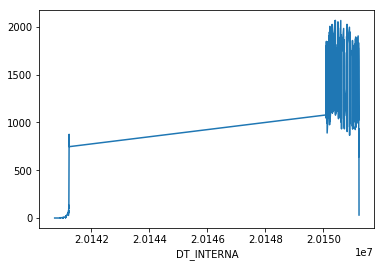

In [7]:
df.groupby(['DT_INTERNA']).count()['CNES'].plot.line()

In [8]:
df2 = pd.DataFrame(df.groupby(['DT_INTERNA']).count()['CNES'].rename('quantidade')).reset_index()
df2.shape

(473, 2)

In [9]:
df2.head()

,DT_INTERNA,quantidade
0,20140731,1
1,20140811,1
2,20140901,1
3,20140902,1
4,20140904,1


In [10]:
df2[:100]

,DT_INTERNA,quantidade
0,20140731,1
1,20140811,1
2,20140901,1
3,20140902,1
4,20140904,1
5,20140911,1
6,20140916,2
7,20140917,2
8,20140918,1
9,20140919,1


In [11]:
df2.tail()

,DT_INTERNA,quantidade
468,20151227,713
469,20151228,933
470,20151229,547
471,20151230,251
472,20151231,32


### 2014 tá estranho, remover essas linhas

In [12]:
df2 = df2.loc[df2['DT_INTERNA'] > 20150000]

### workaround do bug de view limit
[https://github.com/matplotlib/matplotlib/issues/11337](https://github.com/matplotlib/matplotlib/issues/11337)

cria um index na mao, e apaga a coluna ao invés de tentar converter ela pra datetime

In [13]:
df2.index = pd.date_range(start='1/1/2015', end='31/12/2015')

In [14]:
df2 = df2.drop(columns=['DT_INTERNA'])

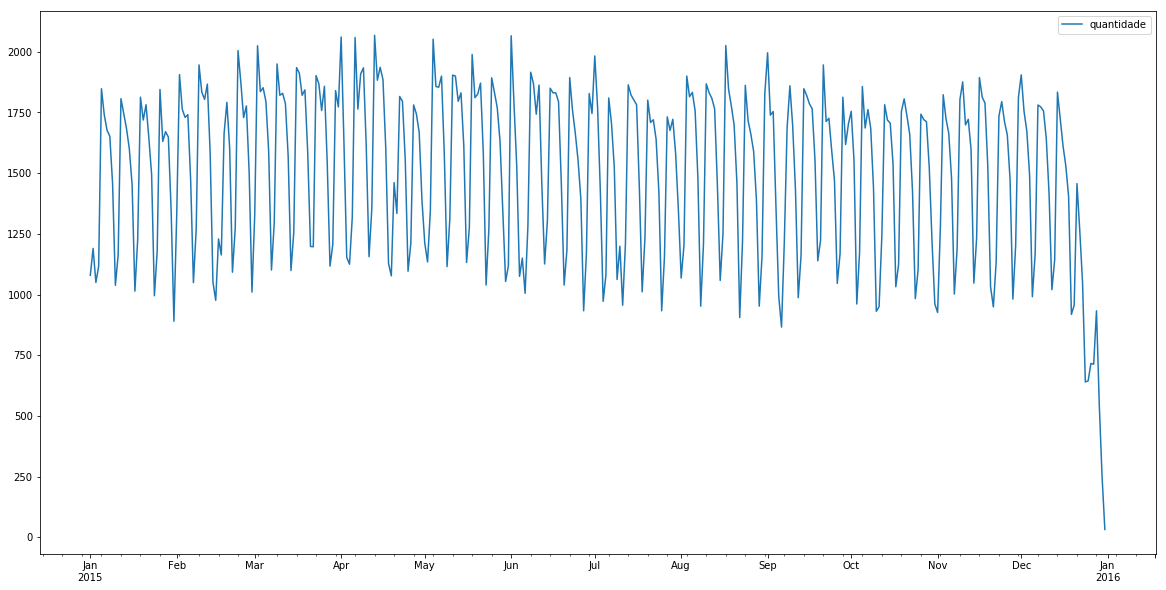

In [15]:
plt.rcParams['figure.figsize'] = [20, 10]
df2.plot.line()

In [ ]:
#df2['DT_INTERNA'] = df2['DT_INTERNA'].apply(lambda dt: pd.to_datetime(str(dt), format='%Y%m%d'))

#df2['DT_INTERNA'] = df2['DT_INTERNA'].apply(lambda dt: datetime.strptime(str(dt), '%Y%m%d'))

In [16]:
df2.dtypes

quantidade    int64
dtype: object

In [17]:

df2['day'] = df2.index.day
df2['dayofweek'] = df2.index.dayofweek
df2['month'] = df2.index.month
df2['year'] = df2.index.year

In [18]:
df2.head(15)

,quantidade,day,dayofweek,month,year
2015-01-01,1079,1,3,1,2015
2015-01-02,1190,2,4,1,2015
2015-01-03,1050,3,5,1,2015
2015-01-04,1116,4,6,1,2015
2015-01-05,1848,5,0,1,2015
2015-01-06,1741,6,1,1,2015
2015-01-07,1677,7,2,1,2015
2015-01-08,1652,8,3,1,2015
2015-01-09,1456,9,4,1,2015
2015-01-10,1038,10,5,1,2015


In [19]:
# split into train and test sets
train_size = int(len(df2) * 0.75)
test_size = len(df2) - train_size

In [20]:
removed_feats = ['quantidade']
feats = [c for c in df2.columns if c not in removed_feats]

In [21]:
train = df2[:train_size]
test = df2[train_size:]

In [22]:
len(train), len(test), len(train) + len(test) 

(273, 92, 365)

# Random Forest

In [23]:
reg = RandomForestRegressor(max_depth=5, random_state=0) 

In [24]:
reg.fit(train[feats], train[removed_feats]) 

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
trainPredict = reg.predict(train[feats])
testPredict = reg.predict(test[feats])

In [26]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test['quantidade'], testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(test['quantidade'], testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(test['quantidade'], testPredict))

Mean squared error: 120488.50
Root Mean squared error: 347.11
R2 score: 0.27


In [27]:
# GATO DETECTED:
# NA pressa para visualizar as previsões, enchi com zeros as 
# previsões do dia 1 a 9 no train e enchi de zeros os todos os dias de train no test
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, [0])

In [28]:
df2 = df2['quantidade'].reset_index().drop(columns=['index'])

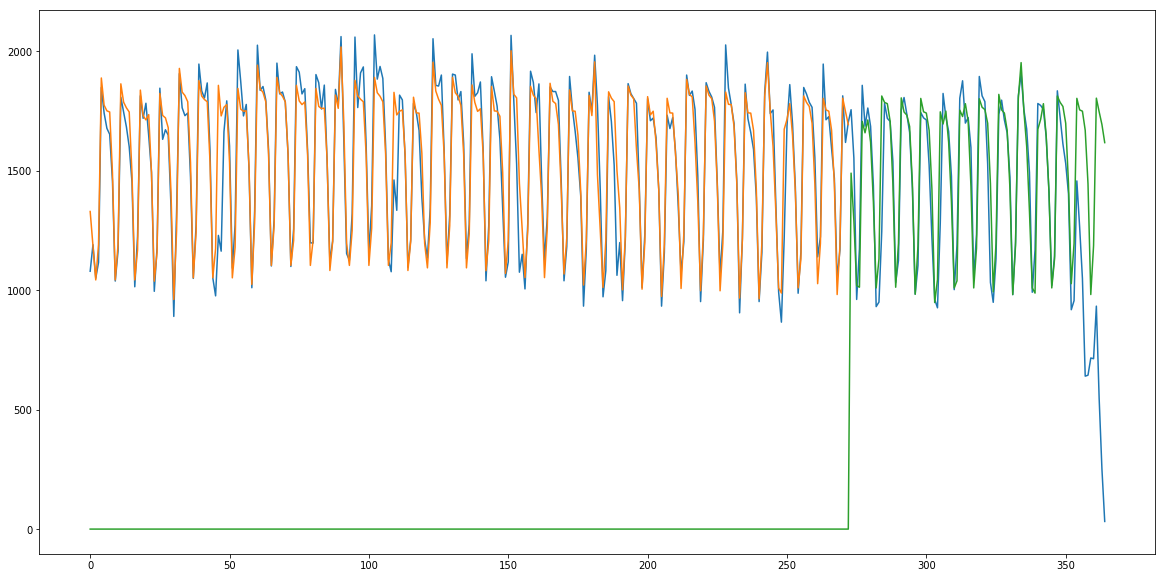

In [29]:
 # plot baseline and predictions
plt.plot(df2)
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# MLP

In [86]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [87]:
model.fit(train[feats], train['quantidade'], epochs=600, batch_size=32, verbose=1) 

Epoch 1/600
273/273 [==============================] - 1s 2ms/step - loss: 2371885.8636
Epoch 2/600
273/273 [==============================] - 0s 186us/step - loss: 2145555.9826
Epoch 3/600
273/273 [==============================] - 0s 197us/step - loss: 2032495.2184
Epoch 4/600
273/273 [==============================] - 0s 199us/step - loss: 1895629.8901
Epoch 5/600
273/273 [==============================] - 0s 270us/step - loss: 1697618.6131
Epoch 6/600
273/273 [==============================] - 0s 194us/step - loss: 1478195.6584
Epoch 7/600
273/273 [==============================] - 0s 170us/step - loss: 1256203.6268
Epoch 8/600
273/273 [==============================] - 0s 183us/step - loss: 1037554.2672
Epoch 9/600
273/273 [==============================] - 0s 318us/step - loss: 831203.4572
Epoch 10/600
273/273 [==============================] - 0s 160us/step - loss: 644884.2546
Epoch 11/600
273/273 [==============================] - 0s 155us/step - loss: 488343.0427
Epoch 12/600


273/273 [==============================] - 0s 143us/step - loss: 103820.0794
Epoch 93/600
273/273 [==============================] - 0s 265us/step - loss: 103690.7780
Epoch 94/600
273/273 [==============================] - 0s 242us/step - loss: 103766.3621
Epoch 95/600
273/273 [==============================] - 0s 513us/step - loss: 103669.7102
Epoch 96/600
273/273 [==============================] - 0s 208us/step - loss: 103625.3400
Epoch 97/600
273/273 [==============================] - 0s 101us/step - loss: 103593.2935
Epoch 98/600
273/273 [==============================] - 0s 197us/step - loss: 103692.1262
Epoch 99/600
273/273 [==============================] - 0s 146us/step - loss: 103645.4192
Epoch 100/600
273/273 [==============================] - 0s 168us/step - loss: 103585.9008
Epoch 101/600
273/273 [==============================] - 0s 186us/step - loss: 103695.4221
Epoch 102/600
273/273 [==============================] - 0s 266us/step - loss: 103683.9409
Epoch 103/600
273/27

273/273 [==============================] - 0s 254us/step - loss: 101478.1481
Epoch 183/600
273/273 [==============================] - 0s 392us/step - loss: 101226.2521
Epoch 184/600
273/273 [==============================] - 0s 209us/step - loss: 101388.7050
Epoch 185/600
273/273 [==============================] - 0s 310us/step - loss: 101699.0889
Epoch 186/600
273/273 [==============================] - 0s 372us/step - loss: 101154.4899
Epoch 187/600
273/273 [==============================] - 0s 398us/step - loss: 101637.1543
Epoch 188/600
273/273 [==============================] - 0s 483us/step - loss: 101237.7884
Epoch 189/600
273/273 [==============================] - 0s 483us/step - loss: 101606.1071
Epoch 190/600
273/273 [==============================] - 0s 469us/step - loss: 101653.3530
Epoch 191/600
273/273 [==============================] - 0s 465us/step - loss: 101816.3793
Epoch 192/600
273/273 [==============================] - 0s 455us/step - loss: 101187.9847
Epoch 193/600

273/273 [==============================] - 0s 135us/step - loss: 97619.5446
Epoch 273/600
273/273 [==============================] - 0s 144us/step - loss: 96433.9913
Epoch 274/600
273/273 [==============================] - 0s 146us/step - loss: 97359.6282
Epoch 275/600
273/273 [==============================] - 0s 442us/step - loss: 96133.3347
Epoch 276/600
273/273 [==============================] - 0s 325us/step - loss: 96463.3507
Epoch 277/600
273/273 [==============================] - 0s 438us/step - loss: 96265.1362
Epoch 278/600
273/273 [==============================] - 0s 291us/step - loss: 97534.6608
Epoch 279/600
273/273 [==============================] - 0s 167us/step - loss: 96999.1585
Epoch 280/600
273/273 [==============================] - 0s 134us/step - loss: 96498.3943
Epoch 281/600
273/273 [==============================] - 0s 197us/step - loss: 96037.9977
Epoch 282/600
273/273 [==============================] - 0s 193us/step - loss: 97799.5377
Epoch 283/600
273/273 [=

273/273 [==============================] - 0s 392us/step - loss: 85156.8073
Epoch 364/600
273/273 [==============================] - 0s 383us/step - loss: 83969.6436
Epoch 365/600
273/273 [==============================] - 0s 374us/step - loss: 84058.0437
Epoch 366/600
273/273 [==============================] - 0s 282us/step - loss: 83707.1566
Epoch 367/600
273/273 [==============================] - 0s 225us/step - loss: 84144.0536
Epoch 368/600
273/273 [==============================] - 0s 85us/step - loss: 86131.5021
Epoch 369/600
273/273 [==============================] - 0s 144us/step - loss: 87312.4355
Epoch 370/600
273/273 [==============================] - 0s 127us/step - loss: 82857.4681
Epoch 371/600
273/273 [==============================] - 0s 160us/step - loss: 83399.4588
Epoch 372/600
273/273 [==============================] - 0s 119us/step - loss: 84146.0020
Epoch 373/600
273/273 [==============================] - 0s 80us/step - loss: 81789.9805
Epoch 374/600
273/273 [===

273/273 [==============================] - 0s 103us/step - loss: 60091.9875
Epoch 455/600
273/273 [==============================] - 0s 109us/step - loss: 60216.6099
Epoch 456/600
273/273 [==============================] - 0s 150us/step - loss: 61293.2931
Epoch 457/600
273/273 [==============================] - 0s 461us/step - loss: 60850.5365
Epoch 458/600
273/273 [==============================] - 0s 76us/step - loss: 62208.1146
Epoch 459/600
273/273 [==============================] - 0s 334us/step - loss: 59574.7240
Epoch 460/600
273/273 [==============================] - 0s 135us/step - loss: 58174.4632
Epoch 461/600
273/273 [==============================] - 0s 132us/step - loss: 58027.3891
Epoch 462/600
273/273 [==============================] - 0s 128us/step - loss: 57587.0910
Epoch 463/600
273/273 [==============================] - 0s 111us/step - loss: 57388.8815
Epoch 464/600
273/273 [==============================] - 0s 141us/step - loss: 57420.2782
Epoch 465/600
273/273 [==

273/273 [==============================] - 0s 124us/step - loss: 39132.5162
Epoch 546/600
273/273 [==============================] - 0s 114us/step - loss: 40848.9564
Epoch 547/600
273/273 [==============================] - 0s 103us/step - loss: 38913.7244
Epoch 548/600
273/273 [==============================] - 0s 110us/step - loss: 38628.2044
Epoch 549/600
273/273 [==============================] - 0s 85us/step - loss: 40540.8758
Epoch 550/600
273/273 [==============================] - 0s 178us/step - loss: 38279.2780
Epoch 551/600
273/273 [==============================] - 0s 83us/step - loss: 38906.7869
Epoch 552/600
273/273 [==============================] - 0s 94us/step - loss: 38332.6492
Epoch 553/600
273/273 [==============================] - 0s 176us/step - loss: 38558.4706
Epoch 554/600
273/273 [==============================] - 0s 88us/step - loss: 45394.5812
Epoch 555/600
273/273 [==============================] - 0s 147us/step - loss: 41979.0125
Epoch 556/600
273/273 [=====

In [88]:
# Estimate model performance
trainScore = model.evaluate(train[feats], train['quantidade'], verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(test[feats], test['quantidade'], verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 36739.46 MSE (191.68 RMSE)
Test Score: 116567.85 MSE (341.42 RMSE)


In [89]:
trainPredict = model.predict(train[feats])
testPredict = model.predict(test[feats])

In [90]:

for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, [0])

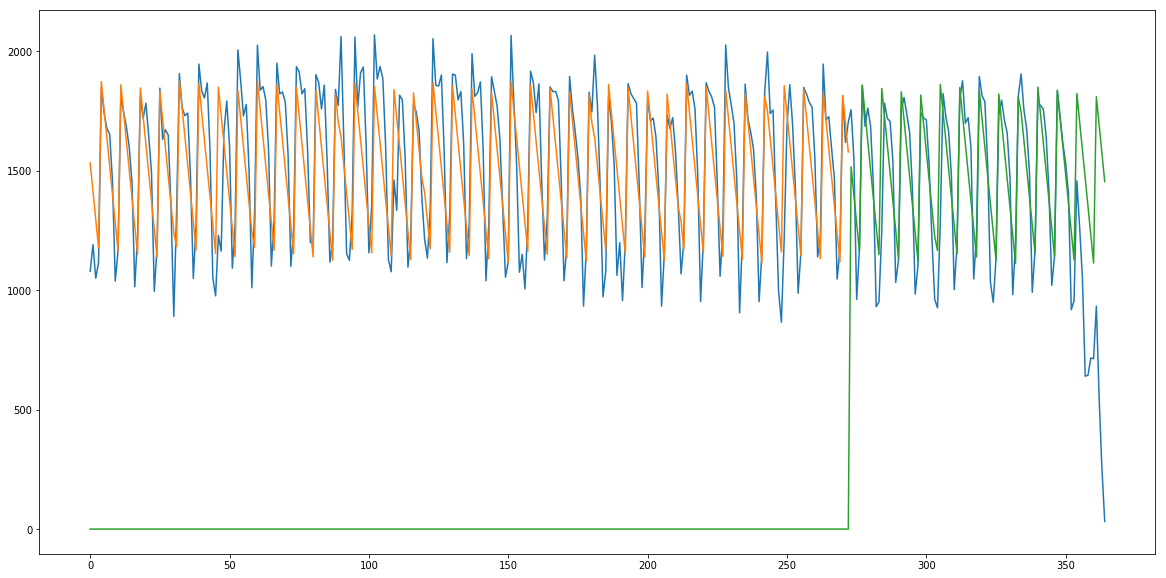

In [91]:
 # plot baseline and predictions
plt.plot(df2['quantidade'])
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()